<a href="https://colab.research.google.com/github/raghavendranhp/Financial_Risk_Detection/blob/main/Financial_Risk_Analysis_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div id="custom-header" style="padding: 15px; color: white; margin: 0;

*   List item

*   List item
*   List item


*   List item

font-size: 28px; font-family: 'Times New Roman', Times, serif; text-align: center; display: fill; border-radius: 15px; background-color: #6D214F; overflow: hidden; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <b> Financial Risk Detection👨‍💼:- Pre-Processing </b>
</div>

<div id="custom-header" style="padding: 0px; color: white; margin: 0; font-size: 22px; font-family: 'Times New Roman', Times, serif; text-align: center; display: fill; border-radius: 10px; background-color: #6D214F; overflow: hidden; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <b>  Importing Libraries </b>
</div>

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
from pprint import PrettyPrinter
from datetime import datetime, time

#Data visualization libraries
import seaborn as sns
sns.set()
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.style as style
import itertools
%matplotlib inline

#Machine learning libraries
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)

#Ignore FutureWarnings to avoid clutter in the output
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#Initialize PrettyPrinter for neat printing
pp = PrettyPrinter(indent=2)

In [2]:
import pandas as pd

# Set the maximum number of displayed columns for Pandas DataFrames to 'None' (display all columns)
pd.set_option('display.max_columns', None)

# Set the maximum number of displayed rows for Pandas DataFrames to 200
pd.set_option('display.max_rows', 200)

# Set the maximum column width to 'None' (display complete content)
pd.set_option('display.max_colwidth', None)

# Set the maximum width of the display in characters
pd.set_option('display.width', 1000)

# Enable the display of DataFrames with expanded representation
# This means if the DataFrame has too many columns to fit horizontally within the display,
# it will display it across multiple lines instead of compressing it into fewer lines.
pd.set_option('display.expand_frame_repr', True)


<div id="custom-header" style="padding: 0px; color: white; margin: 0; font-size: 22px; font-family: 'Times New Roman', Times, serif; text-align: center; display: fill; border-radius: 10px; background-color: #6D214F; overflow: hidden; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <b>  Loading Dataset </b>
</div>

In [3]:
df_column_description_org=pd.read_excel(r"/content/drive/MyDrive/Dataset/Financial Risk Analysis/columns_description.xlsx")
df_app_data_org=pd.read_csv(r"/content/drive/MyDrive/Dataset/Financial Risk Analysis/application_data.csv")
df_pre_app_org=pd.read_csv(r"/content/drive/MyDrive/Dataset/Financial Risk Analysis/previous_application.csv")

In [4]:
#Make a copy of the original DataFrame to work with
df_app_data=df_app_data_org.copy()
df_pre_app=df_pre_app_org.copy()
df_column_description=df_column_description_org.copy()

<div id="custom-header" style="padding: 0px; color: white; margin: 0; font-size: 22px; font-family: 'Times New Roman', Times, serif; text-align: center; display: fill; border-radius: 10px; background-color: #6D214F; overflow: hidden; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <b>  Data Dictionary </b>
</div>

In [5]:
#df_column_description=df_column_description.drop(['Unnamed: 0'],axis=1)
display(df_column_description.head(160))

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


<div id="custom-header" style="padding: 0px; color: white; margin: 0; font-size: 22px; font-family: 'Times New Roman', Times, serif; text-align: center; display: fill; border-radius: 10px; background-color: #6D214F; overflow: hidden; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <b>  Data Wrangling </b>
</div>

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> Application Data</div>

In [6]:
df_app_data.shape

(307511, 122)

In [7]:
df_app_data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [8]:
df_app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [9]:
#Display descriptive statistics for numerical columns in the DataFrame
df_app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [10]:
#Display descriptive statistics for categorical (object) columns in the DataFrame
df_app_data.describe(include="O")

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


In [11]:
#Get the names of categorical columns in the DataFrame
categorical_columns_app=df_app_data.select_dtypes(include='O').columns
#Get the names of numerical columns in the DataFrame
numerical_columns_app=df_app_data.select_dtypes(include='number').columns

In [12]:
#Iterate over each categorical column in the DataFrame
for i in categorical_columns_app:
    #Print the unique values of the current categorical column
    print('Unique values of', i, set(df_app_data[i]))
    #Print the count of each unique value in the current categorical column
    print(df_app_data[i].value_counts())
    #Print a separator line for better readability
    print('-' * 50)

Unique values of NAME_CONTRACT_TYPE {'Revolving loans', 'Cash loans'}
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
--------------------------------------------------
Unique values of CODE_GENDER {'M', 'F', 'XNA'}
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
--------------------------------------------------
Unique values of FLAG_OWN_CAR {'Y', 'N'}
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
--------------------------------------------------
Unique values of FLAG_OWN_REALTY {'Y', 'N'}
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
--------------------------------------------------
Unique values of NAME_TYPE_SUITE {'Family', 'Unaccompanied', nan, 'Group of people', 'Other_A', 'Children', 'Other_B', 'Spouse, partner'}
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people   

In [13]:
#Calculate null value percentage for each column
null_percentage_app= (df_app_data.isnull().mean() * 100).round(2)

#Create a new dataframe to display columns and null value percentages
null_df_app = pd.DataFrame({'Column': null_percentage_app.index, 'Null Percentage': null_percentage_app.values})

#Display the dataframe
print(null_df_app.sort_values(ascending=False,by='Null Percentage').head(100))

                           Column  Null Percentage
76                COMMONAREA_MEDI            69.87
48                 COMMONAREA_AVG            69.87
62                COMMONAREA_MODE            69.87
70       NONLIVINGAPARTMENTS_MODE            69.43
56        NONLIVINGAPARTMENTS_AVG            69.43
84       NONLIVINGAPARTMENTS_MEDI            69.43
86             FONDKAPREMONT_MODE            68.39
68          LIVINGAPARTMENTS_MODE            68.35
54           LIVINGAPARTMENTS_AVG            68.35
82          LIVINGAPARTMENTS_MEDI            68.35
52                  FLOORSMIN_AVG            67.85
66                 FLOORSMIN_MODE            67.85
80                 FLOORSMIN_MEDI            67.85
75               YEARS_BUILD_MEDI            66.50
61               YEARS_BUILD_MODE            66.50
47                YEARS_BUILD_AVG            66.50
21                    OWN_CAR_AGE            65.99
81                  LANDAREA_MEDI            59.38
67                  LANDAREA_MO

In [14]:
#Check the percentage of Null value
null_app=round(df_app_data.isnull().sum()/len(df_app_data)*100,2)
#null_pre.sort_values(ascending=False).head(100)
null_app_40=null_app[null_app>40].sort_values(ascending=False).head(100)
print(null_app_40)
print(len(null_app[null_app>40]))

COMMONAREA_AVG                  69.87
COMMONAREA_MEDI                 69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MEDI        69.43
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MEDI           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MODE           68.35
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
FLOORSMIN_AVG                   67.85
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
YEARS_BUILD_MEDI                66.50
OWN_CAR_AGE                     65.99
LANDAREA_MODE                   59.38
LANDAREA_MEDI                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MODE               58.52
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [15]:
print(null_app.filter(like='COMMONAREA'))
print(null_app.filter(like='NONLIVINGAPARTMENTS'))
print(null_app.filter(like='LIVINGAPARTMENTS'))
print(null_app.filter(like='FLOORSMIN'))
print(null_app.filter(like='YEARS_BUILD'))
print(null_app.filter(like='LANDAREA'))
print(null_app.filter(like='HOUSETYPE'))
print(null_app.filter(like='LIVINGAREA'))
print(null_app.filter(like='ENTRANCES'))
print(null_app.filter(like='APARTMENTS'))
print(null_app.filter(like='ELEVATORS'))
print(null_app.filter(like='NONLIVINGAREA'))
print(null_app.filter(like='BASEMENTAREA'))
print(null_app.filter(like='LANDAREA'))
print(null_app.filter(like='WALLSMATERIAL'))
print(null_app.filter(like='HOUSETYPE'))
print(null_app.filter(like='EXT_SOURCE'))
print(null_app.filter(like='FONDKAPREMONT'))
print(null_app.filter(like='CAR'))

COMMONAREA_AVG     69.87
COMMONAREA_MODE    69.87
COMMONAREA_MEDI    69.87
dtype: float64
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_MEDI    69.43
dtype: float64
LIVINGAPARTMENTS_AVG        68.35
NONLIVINGAPARTMENTS_AVG     69.43
LIVINGAPARTMENTS_MODE       68.35
NONLIVINGAPARTMENTS_MODE    69.43
LIVINGAPARTMENTS_MEDI       68.35
NONLIVINGAPARTMENTS_MEDI    69.43
dtype: float64
FLOORSMIN_AVG     67.85
FLOORSMIN_MODE    67.85
FLOORSMIN_MEDI    67.85
dtype: float64
YEARS_BUILD_AVG     66.5
YEARS_BUILD_MODE    66.5
YEARS_BUILD_MEDI    66.5
dtype: float64
LANDAREA_AVG     59.38
LANDAREA_MODE    59.38
LANDAREA_MEDI    59.38
dtype: float64
HOUSETYPE_MODE    50.18
dtype: float64
LIVINGAREA_AVG        50.19
NONLIVINGAREA_AVG     55.18
LIVINGAREA_MODE       50.19
NONLIVINGAREA_MODE    55.18
LIVINGAREA_MEDI       50.19
NONLIVINGAREA_MEDI    55.18
dtype: float64
ENTRANCES_AVG     50.35
ENTRANCES_MODE    50.35
ENTRANCES_MEDI    50.35
dtype: float64
APAR

In [16]:
df_app_data_fin=df_app_data.drop(columns=null_app_40.index)

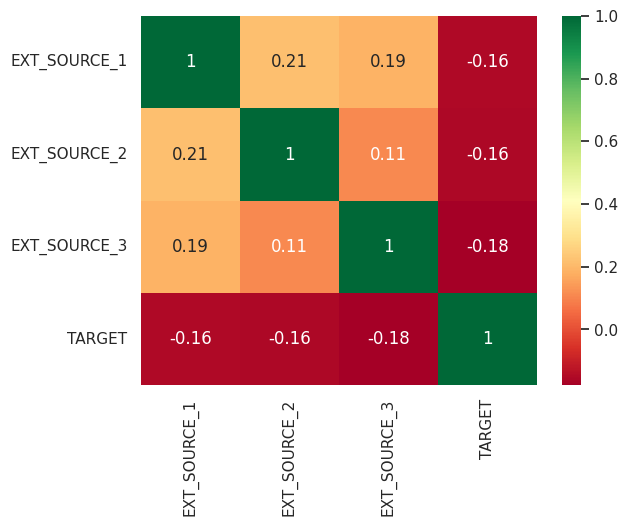

In [17]:
# Checking correlation of EXT_SOURCE_X columns vs TARGET column
Source = df_app_data[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn")

In [18]:
df_app_data_fin.drop(columns=["EXT_SOURCE_2","EXT_SOURCE_3"],inplace=True)

<ipython-input-19-49e7ebcf44cc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_flag["TARGET"] = df_flag["TARGET"].replace({1: "Defaulter", 0: "Repayer"})


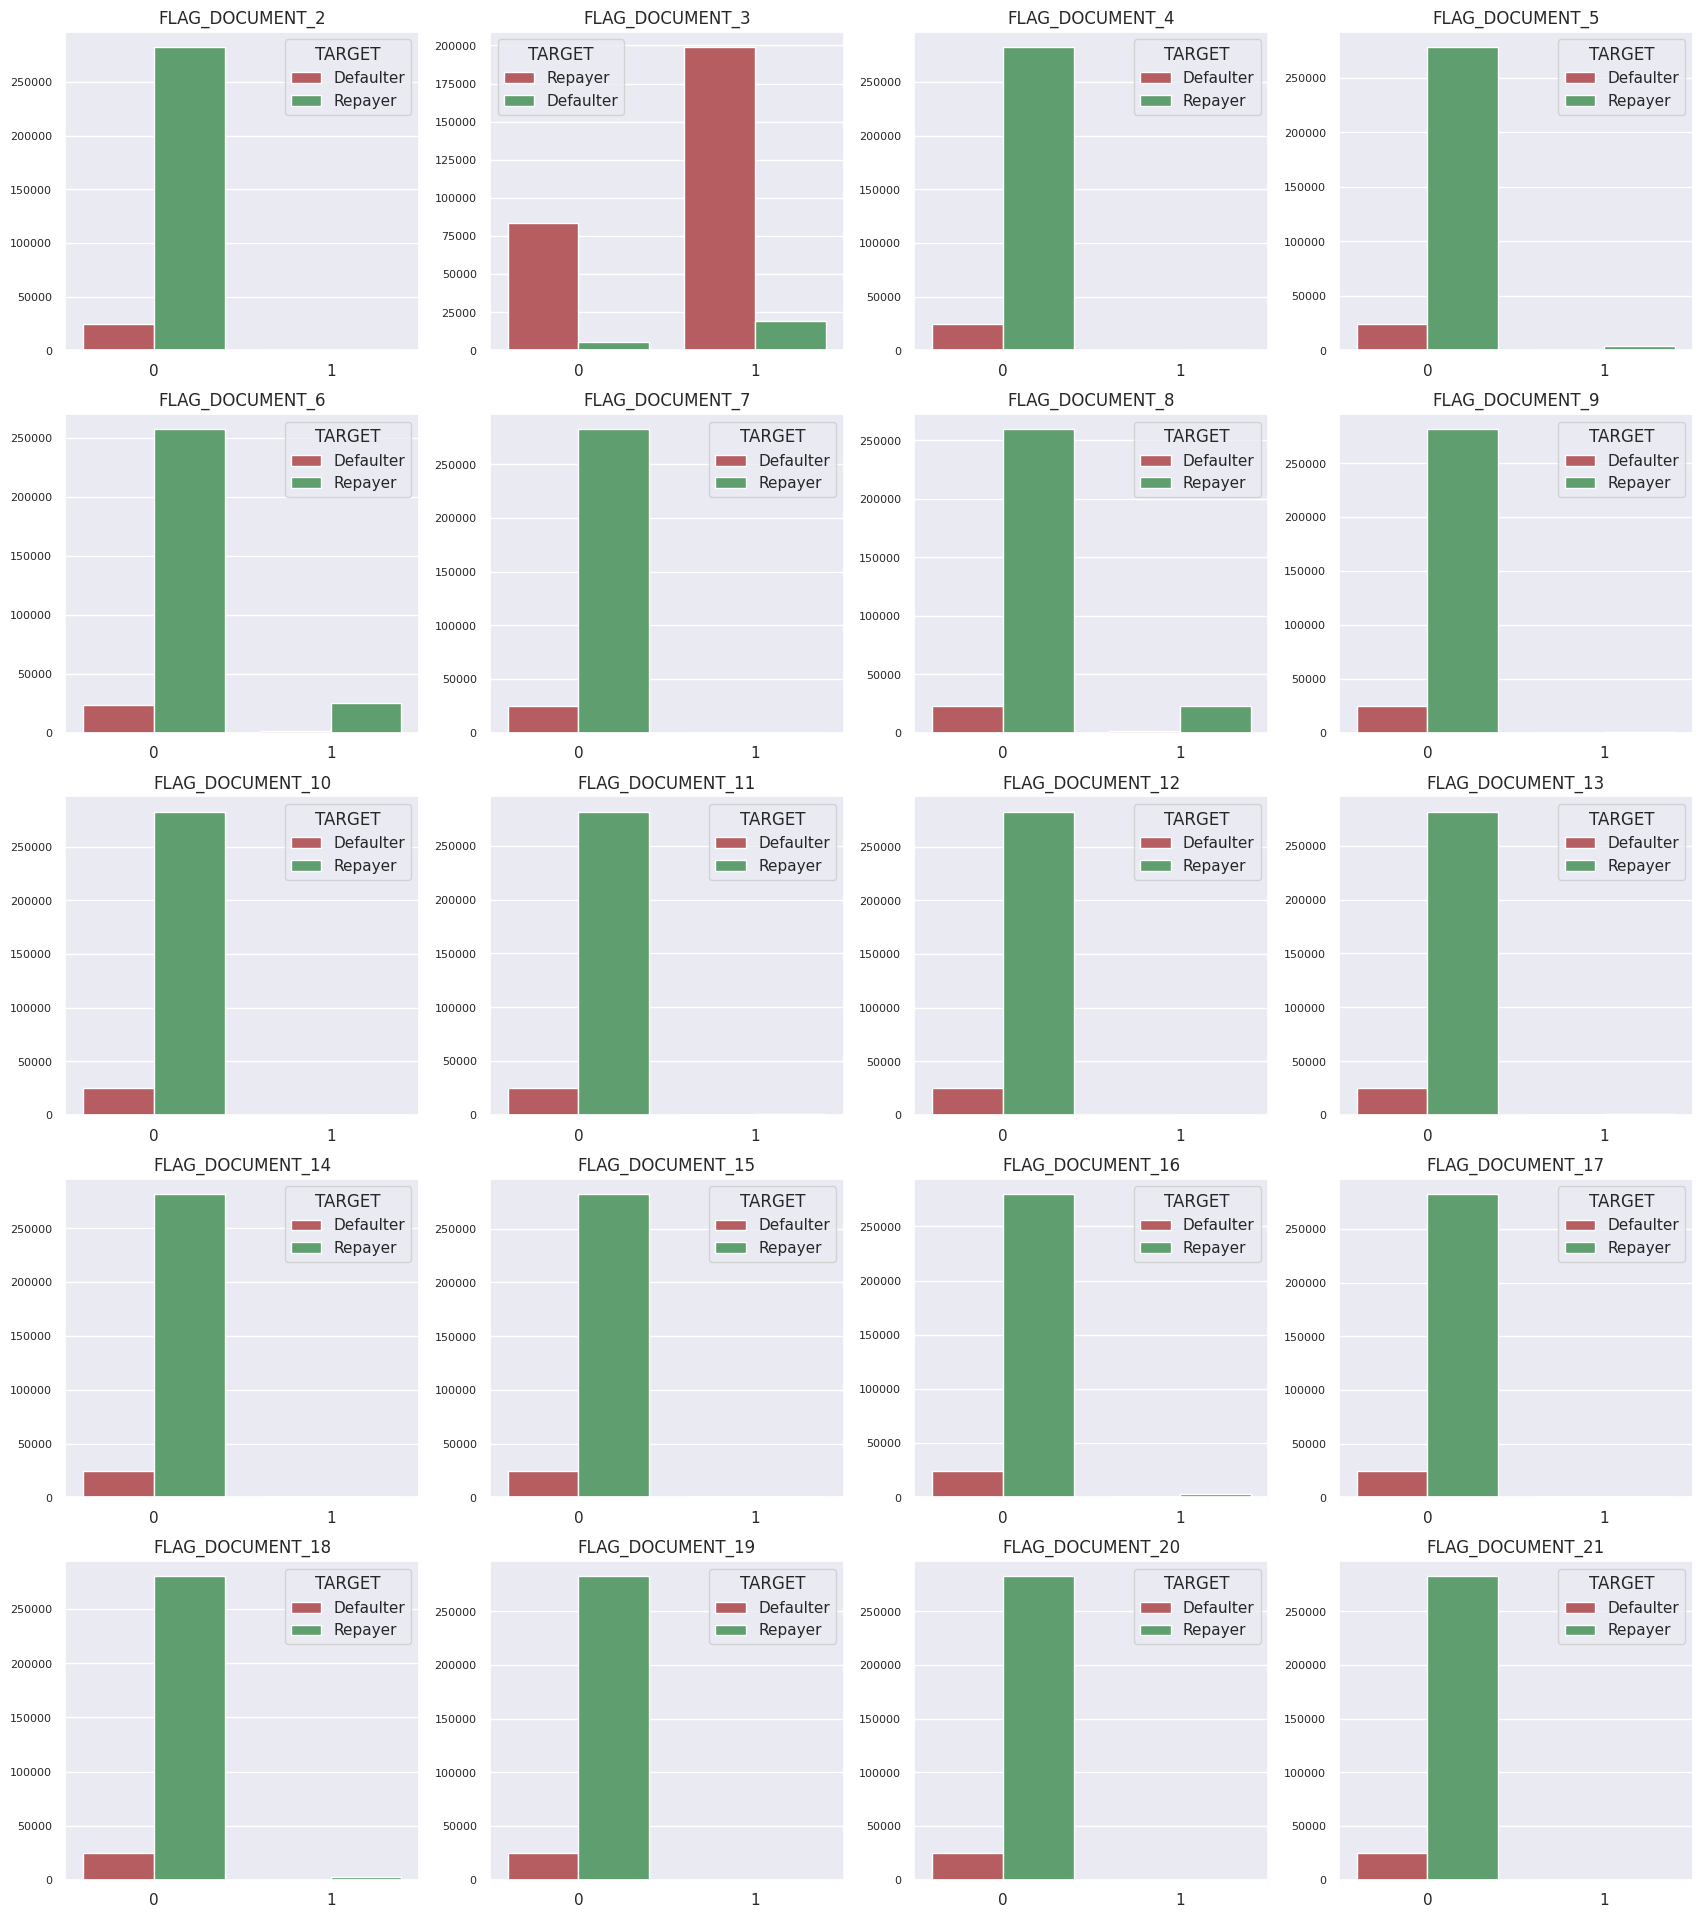

In [19]:
col_Doc = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df_flag = df_app_data[col_Doc + ["TARGET"]]

df_flag["TARGET"] = df_flag["TARGET"].replace({1: "Defaulter", 0: "Repayer"})

length = len(col_Doc)

fig = plt.figure(figsize=(21, 24))

for i, j in itertools.zip_longest(col_Doc, range(length)):
    plt.subplot(5, 4, j+1)
    ax = sns.countplot(data=df_flag, x=i, hue="TARGET", palette=["r", "g"])
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

plt.show()


In [20]:
col_Doc.remove('FLAG_DOCUMENT_3')

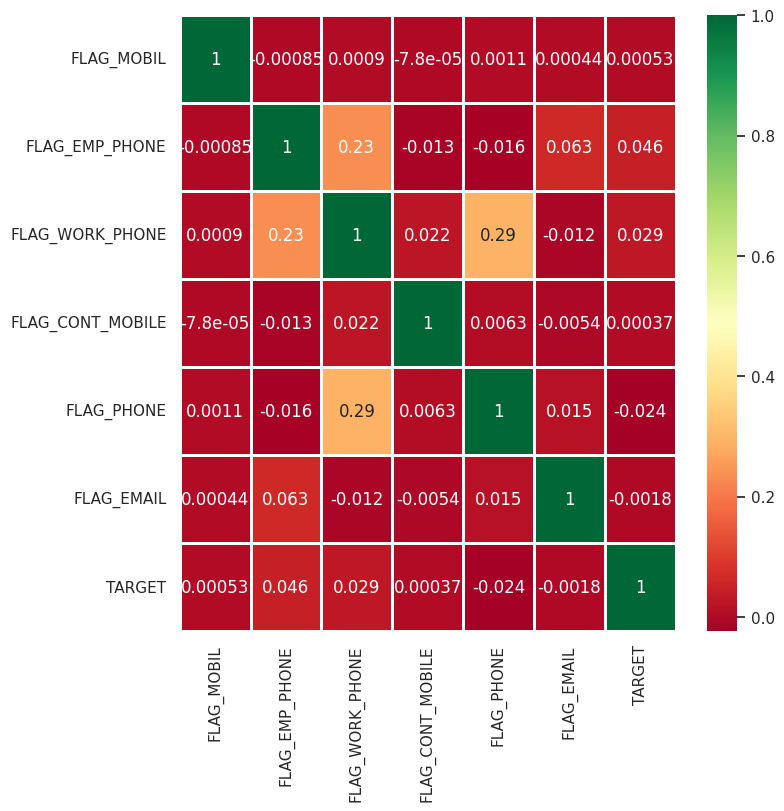

In [21]:
# checking is there is any correlation between mobile phone, work phone etc, email, Family members and Region rating
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
Contact_corr = df_app_data_fin[contact_col].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
            xticklabels=Contact_corr.columns,
            yticklabels=Contact_corr.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=1)


In [22]:
# including the 6 FLAG columns to be deleted
contact_col.remove('TARGET')

In [23]:
df_app_data_fin.drop(columns=col_Doc,inplace=True)
df_app_data_fin.drop(columns=contact_col,inplace=True)

In [120]:
#Find columns with missing values greater than or equal to 1
missing_values_count = df_app_data_fin.isnull().sum()
columns_with_missing_values = missing_values_count[missing_values_count >= 1]
print("Columns with missing values greater than or equal to 1:")
print(columns_with_missing_values)

Columns with missing values greater than or equal to 1:
Series([], dtype: int64)


In [86]:
for i in columns_with_missing_values.index:
  if i in categorical_columns_app:
    print (i)


In [84]:
df_app_data_fin['NAME_TYPE_SUITE'].fillna((df_app_data_fin['NAME_TYPE_SUITE'].mode()[0]),inplace = True)
df_app_data_fin['OCCUPATION_TYPE'].fillna('Others', inplace =True)

In [105]:
colu_app=['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE']

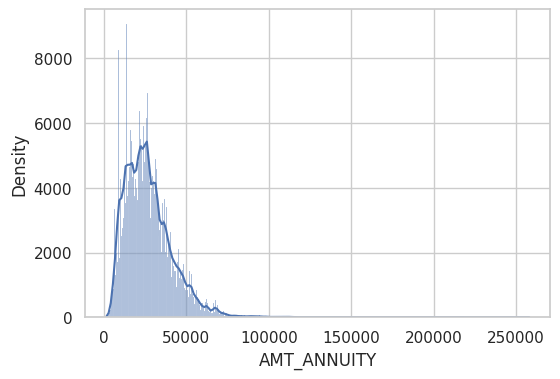

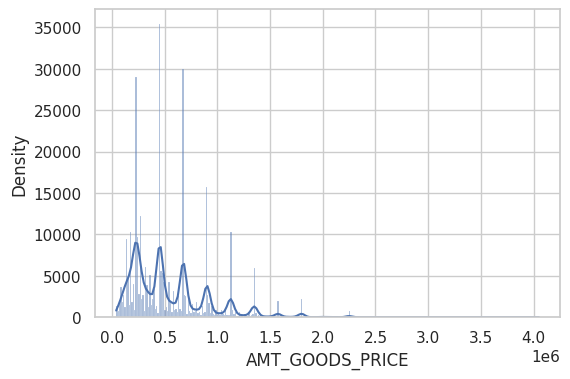

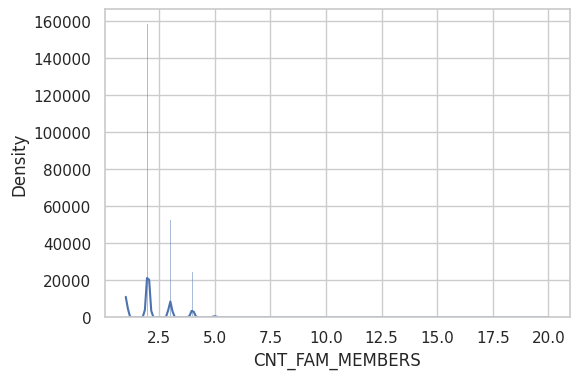

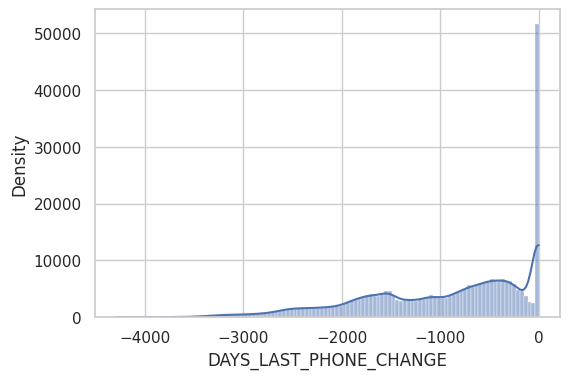

In [114]:
for col in colu_app:
    plt.figure(figsize=(6, 4))
    sns.set_style('whitegrid')
    sns.histplot(df_app_data_fin[col], kde=True)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

In [115]:
mean_value_AA = df_app_data_fin['AMT_ANNUITY'].mean()
df_app_data_fin['AMT_ANNUITY'].fillna(mean_value_AA, inplace=True)
mean_value_Agp = df_app_data_fin['AMT_GOODS_PRICE'].mean()
df_app_data_fin['AMT_GOODS_PRICE'].fillna(mean_value_Agp, inplace=True)
med_value_CFM = df_app_data_fin['CNT_FAM_MEMBERS'].median()
df_app_data_fin['CNT_FAM_MEMBERS'].fillna(med_value_CFM, inplace=True)
mod_value_DLP = df_app_data_fin['DAYS_LAST_PHONE_CHANGE'].mode()[0]
df_app_data_fin['DAYS_LAST_PHONE_CHANGE'].fillna(mod_value_DLP, inplace=True)

In [117]:
df_app_data_fin[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [118]:
amount = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
         'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for col in amount:
    df_app_data_fin[col].fillna(df_app_data_fin[col].median(),inplace = True)

In [119]:
df_app_data_fin['OBS_30_CNT_SOCIAL_CIRCLE'] = df_app_data_fin['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0)
df_app_data_fin['DEF_30_CNT_SOCIAL_CIRCLE'] = df_app_data_fin['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0)
df_app_data_fin['OBS_60_CNT_SOCIAL_CIRCLE'] = df_app_data_fin['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0)
df_app_data_fin['DEF_60_CNT_SOCIAL_CIRCLE'] = df_app_data_fin['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0)

## <div style="text-align: left; background-color:#CFD9F1 ; font-family: Trebuchet MS; color: #0A3399; padding: 15px; line-height:1;border-radius:2px; margin-bottom: 0em; text-align: center; font-size: 20px;border-style: solid;border-color: dark green;"> Previous Application Data</div>

In [24]:
df_pre_app.shape

(1670214, 37)

In [25]:
df_pre_app.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [26]:
df_pre_app.head(50)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_pre_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [28]:
#Display descriptive statistics for categorical (object) columns in the DataFrame
df_pre_app.describe(include="O")

,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
count,1670214,1670214,1670214,1670214,1670214,1670214,1670214,849809,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1669868
unique,4,7,2,25,4,4,9,7,4,28,5,3,8,11,5,17
top,Cash loans,TUESDAY,Y,XAP,Approved,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,POS,XNA,Credit and cash offices,XNA,XNA,Cash
freq,747553,255118,1661739,922661,1036781,1033552,1353093,508970,1231261,950809,691011,1063666,719968,855720,517215,285990


In [29]:
#Get the names of categorical columns in the DataFrame
categorical_columns_pre=df_pre_app.select_dtypes(include='O').columns
#Get the names of numerical columns in the DataFrame
numerical_columns_pre=df_pre_app.select_dtypes(include='number').columns

In [30]:
#Iterate over each categorical column in the DataFrame
for i in categorical_columns_pre:
    #Print the unique values of the current categorical column
    print('Unique values of', i, set(df_pre_app[i]))
    #Print the count of each unique value in the current categorical column
    print(df_pre_app[i].value_counts())
    #Print a separator line for better readability
    print('-' * 50)

Unique values of NAME_CONTRACT_TYPE {'Revolving loans', 'Cash loans', 'Consumer loans', 'XNA'}
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64
--------------------------------------------------
Unique values of WEEKDAY_APPR_PROCESS_START {'MONDAY', 'THURSDAY', 'SATURDAY', 'WEDNESDAY', 'TUESDAY', 'FRIDAY', 'SUNDAY'}
TUESDAY      255118
WEDNESDAY    255010
MONDAY       253557
FRIDAY       252048
THURSDAY     249099
SATURDAY     240631
SUNDAY       164751
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64
--------------------------------------------------
Unique values of FLAG_LAST_APPL_PER_CONTRACT {'Y', 'N'}
Y    1661739
N       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64
--------------------------------------------------
Unique values of NAME_CASH_LOAN_PURPOSE {'Medicine', 'Repairs', 'Business development', 'Buying a home', 'Buying a garage', 'Gasification / water supply', 'Other', 'Buyi

In [62]:
#Check the percentage of Null value
null_pre=round(df_pre_app.isnull().sum()/len(df_pre_app)*100,2)
#null_pre.sort_values(ascending=False).head(100)
null_pre_40=null_pre[null_pre>40].sort_values(ascending=False).head(100)
print(null_pre_40)
print(len(null_pre[null_pre>40]))

RATE_INTEREST_PRIMARY        99.64
RATE_INTEREST_PRIVILEGED     99.64
AMT_DOWN_PAYMENT             53.64
RATE_DOWN_PAYMENT            53.64
NAME_TYPE_SUITE              49.12
DAYS_FIRST_DRAWING           40.30
DAYS_FIRST_DUE               40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_LAST_DUE                40.30
DAYS_TERMINATION             40.30
NFLAG_INSURED_ON_APPROVAL    40.30
dtype: float64
11


In [32]:
print(null_pre.filter(like='RATE'))
print(null_pre.filter(like='NAME'))
print(null_pre.filter(like='DAYS'))
print(null_pre.filter(like='AMT'))
print(null_pre.filter(like='NFLAG'))

RATE_DOWN_PAYMENT           53.64
RATE_INTEREST_PRIMARY       99.64
RATE_INTEREST_PRIVILEGED    99.64
dtype: float64
NAME_CONTRACT_TYPE         0.00
NAME_CASH_LOAN_PURPOSE     0.00
NAME_CONTRACT_STATUS       0.00
NAME_PAYMENT_TYPE          0.00
NAME_TYPE_SUITE           49.12
NAME_CLIENT_TYPE           0.00
NAME_GOODS_CATEGORY        0.00
NAME_PORTFOLIO             0.00
NAME_PRODUCT_TYPE          0.00
NAME_SELLER_INDUSTRY       0.00
NAME_YIELD_GROUP           0.00
dtype: float64
DAYS_DECISION                 0.0
DAYS_FIRST_DRAWING           40.3
DAYS_FIRST_DUE               40.3
DAYS_LAST_DUE_1ST_VERSION    40.3
DAYS_LAST_DUE                40.3
DAYS_TERMINATION             40.3
dtype: float64
AMT_ANNUITY         22.29
AMT_APPLICATION      0.00
AMT_CREDIT           0.00
AMT_DOWN_PAYMENT    53.64
AMT_GOODS_PRICE     23.08
dtype: float64
NFLAG_LAST_APPL_IN_DAY        0.0
NFLAG_INSURED_ON_APPROVAL    40.3
dtype: float64


In [72]:
# Listing down columns which are not needed
Unnecessary_previous = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
df_pre_app_fin=df_pre_app.drop(columns=null_pre_40.index)
df_pre_app_fin=df_pre_app_fin.drop(columns=Unnecessary_previous)

In [52]:
print(df_pre_app_fin.shape)

(1670214, 22)


In [64]:
df_pre_app_fin.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY               372235
AMT_APPLICATION                0
AMT_CREDIT                     1
AMT_GOODS_PRICE           385515
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT               372230
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION          346
dtype: int64

In [65]:
null_pre=round(df_pre_app_fin.isnull().sum()/len(df_pre_app)*100,2)
#null_pre.sort_values(ascending=False).head(100)
null_pre_0=null_pre[null_pre>0].sort_values(ascending=False).head(100)
print(null_pre_0)

AMT_GOODS_PRICE        23.08
AMT_ANNUITY            22.29
CNT_PAYMENT            22.29
PRODUCT_COMBINATION     0.02
dtype: float64


In [55]:
print(null_pre_0.index)

Index(['AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT', 'PRODUCT_COMBINATION'], dtype='object')


In [76]:
mode_value_pc = df_pre_app_fin['PRODUCT_COMBINATION'].mode()[0]
df_pre_app_fin['PRODUCT_COMBINATION'].fillna(mode_value_pc, inplace=True)
mode_value_amtcr = df_pre_app_fin['AMT_CREDIT'].mode()[0]
df_pre_app_fin['AMT_CREDIT'].fillna(mode_value_amtcr, inplace=True)

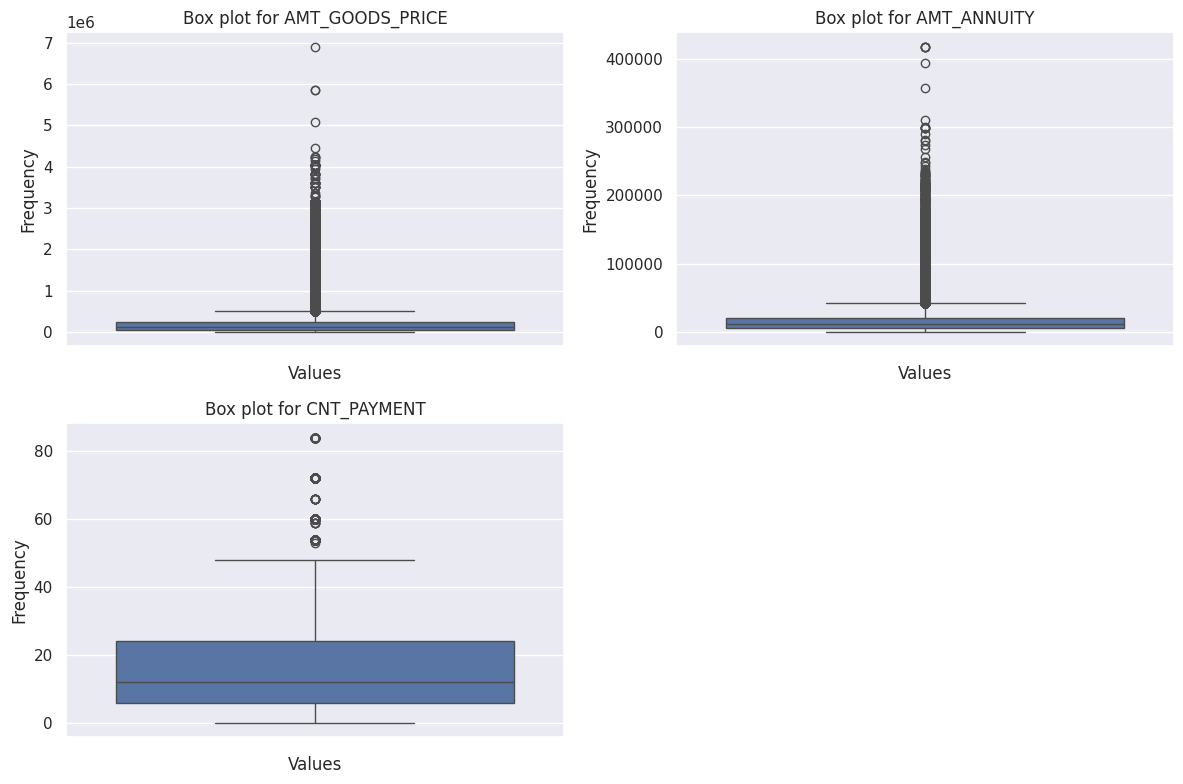

In [73]:
# Specify the columns for which you want to plot box plots
columns = ['AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT']

# Plot separate box plots for each column
plt.figure(figsize=(12, 8))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_pre_app_fin[column])
    plt.title(f'Box plot for {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


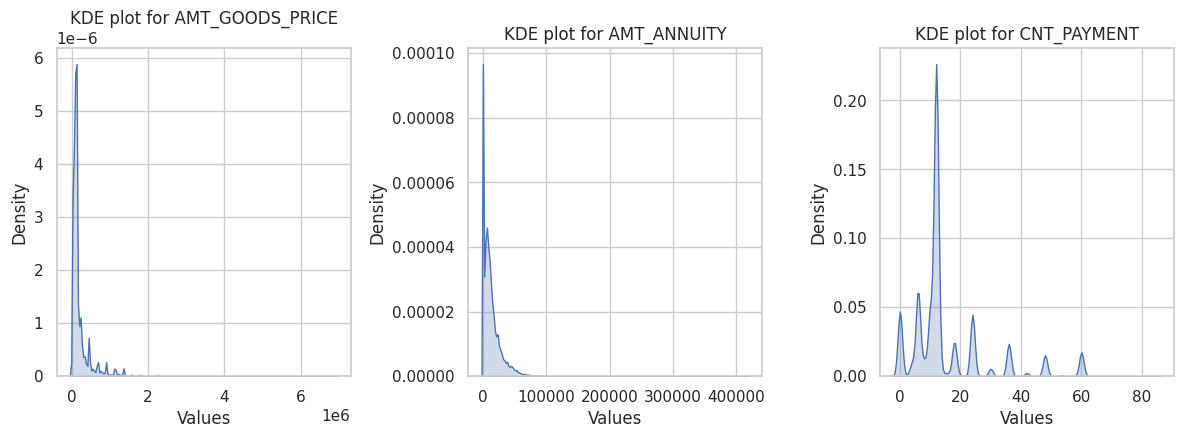

In [104]:
# Plot KDE plots for each column
plt.figure(figsize=(12, 8))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(df_pre_app_fin[column], shade=True)
    plt.title(f'KDE plot for {column}')
    plt.xlabel('Values')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


In [75]:
med_value_cnt = df_pre_app_fin['CNT_PAYMENT'].median()
df_pre_app_fin['CNT_PAYMENT'].fillna(med_value_cnt, inplace=True)
med_value_amtgp = df_pre_app_fin['AMT_GOODS_PRICE'].median()
df_pre_app_fin['AMT_GOODS_PRICE'].fillna(med_value_amtgp, inplace=True)
meam_value_amtat = df_pre_app_fin['AMT_ANNUITY'].median()
df_pre_app_fin['AMT_ANNUITY'].fillna(med_value_cnt, inplace=True)